In [146]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
all_divisions = {
    "Premier Main": 424,
    "2": 425,
    "3": 426,
    "4": 427,
    "5": 428,
    "6": 429,
    "7A": 430,
    "7B": 431,
    "8A": 432,
    "8B": 433,
    "9": 434,
    "10": 435,
    "11": 436,
    "12": 437,
    "13A": 438,
    "13B": 439,
    "14": 440,
    "15A": 441,
    "15B": 442,
    "Premier Masters": 443,
    "M2": 444,
    "M3": 445,
    "M4": 446,
    "Premier Ladies": 447,
    "L2": 448,
    "L3": 449,
    "L4": 450,
    }

In [117]:
base_directory = r"C:\Users\bpali\PycharmProjects\SquashApp\previous_seasons"

In [118]:
# Load all seasons summary data
summary_df_list = []
for season_folder in os.listdir(base_directory):
    season_folder_path = os.path.join(base_directory, season_folder)
    ranking_df_folder = os.path.join(season_folder_path, "summary_df")
    for file in os.listdir(ranking_df_folder):
        if not file.endswith("summary_df.csv"):
            continue
        file_path = os.path.join(ranking_df_folder, file)
        df = pd.read_csv(file_path)
        # Add Division column to the dataframe
        df["Division"] = file.split("_")[0]
        # Add Season column to the dataframe
        df["Season"] = season_folder
        # Add Rank column to the dataframe
        df["Rank"] = df.index + 1
        summary_df_list.append(df)

# Concatenate all the dataframes in df_list into one big dataframe
big_summary_df = pd.concat(summary_df_list, ignore_index=True)

In [119]:
big_summary_df

,Team,Played,Won,Lost,Points,Division,Season,Rank
0,Hong Kong Football Club 10A,21,18,3,94,10,2016-2017,1
1,i-MASK Advance Squash Club 7,21,18,3,91,10,2016-2017,2
2,Perrier KCC 7,21,15,6,83,10,2016-2017,3
3,Hong Kong Football Club 10B,21,13,8,83,10,2016-2017,4
4,Royal Hong Kong Yacht Club 10,21,7,14,46,10,2016-2017,5
...,...,...,...,...,...,...,...,...
1581,Royal Hong Kong Yacht Club M3,16,6,10,48,M3,2023-2024,5
1582,United Services Recreation Club M3,16,8,8,45,M3,2023-2024,6
1583,Hong Kong Club Blue,16,5,11,30,M3,2023-2024,7
1584,Hong Kong Football Club M3B,16,4,12,28,M3,2023-2024,8


In [120]:
# 2024-2025 ranking_df directory
ranking_df_dir = r"C:\Users\bpali\PycharmProjects\SquashApp\2024-2025\ranking_df"

In [121]:
# In the the summary directory are week_x folders (eg week_4). First check the most recent folder (ie the highest number), then check the next highest, etc, 
# using the all_divisions dictionary to make sure we load every division's most recent summary file and avoid loading an older file for a division that has a more recent file.

ranking_dfs = []
for division in all_divisions.keys():
    for week in range(10, 0, -1):
        try:
            ranking_df = pd.read_csv(f"{ranking_df_dir}\\week_{week}\\{division}_ranking_df.csv")
            ranking_df["Season"] = "2024-2025"
            ranking_dfs.append(ranking_df)
            break
        except FileNotFoundError:
            continue

# Concatenate all the summary dataframes into one
ranking_df_2024_2025 = pd.concat(ranking_dfs)

In [122]:
# In the base directory are seasons folders (eg. 2019-2020, 2020-2021, etc.). We want to go through each season folder, go into the ranking_df folder for that season, 
# and read in all the ranking_df files (determined by whether the file ends in ranking_df) into a list of dataframes. We will then concatenate all the dataframes into one big dataframe.
# Add a Season column to the dataframe to keep track of which season the data is from.

ranking_df_list = []
for season_folder in os.listdir(base_directory):
    season_folder_path = os.path.join(base_directory, season_folder)
    ranking_df_folder = os.path.join(season_folder_path, "ranking_df")
    for file in os.listdir(ranking_df_folder):
        if not file.endswith("ranking_df.csv"):
            continue
        file_path = os.path.join(ranking_df_folder, file)
        df = pd.read_csv(file_path)
        df["Season"] = season_folder
        ranking_df_list.append(df)

# Concatenate all the dataframes in df_list into one big dataframe
big_ranking_df = pd.concat(ranking_df_list)


In [123]:
# Concatenate the 2024-2025 ranking_df with the big_ranking_df
final_ranking_df = pd.concat([big_ranking_df, ranking_df_2024_2025])

### Total number of unique registered players by season

In [124]:
# Get total number of players in each season
total_players = final_ranking_df.groupby("Season")["Name of Player"].nunique()
total_players

Season
2016-2017    1890
2017-2018    1946
2018-2019    1900
2019-2020    1925
2021-2022    1592
2022-2023    1519
2023-2024    1657
2024-2025    1685
Name: Name of Player, dtype: int64

### Total number of unique players in each season to have played 5+ games

In [125]:
# Get total number of players in each season who have played at least 5 matches
total_players_5 = final_ranking_df[final_ranking_df["Games Played"] >= 5].groupby("Season")["Name of Player"].nunique()
total_players_5

Season
2016-2017    1597
2017-2018    1593
2018-2019    1584
2019-2020    1080
2021-2022     980
2022-2023    1252
2023-2024    1336
2024-2025      27
Name: Name of Player, dtype: int64

In [126]:
# Filter big_df to only include players who have played 5+ games
final_ranking_df_filtered = final_ranking_df[final_ranking_df["Games Played"] >= 1]

In [127]:
# Find players in Name of Player column who have played in all 7 seasons of Season column
players = final_ranking_df_filtered.groupby("Name of Player")["Season"].nunique().sort_values(ascending=False)

In [128]:
# Filter players who have played in all 7 seasons
players = players[players == 7]

In [129]:
players

Name of Player
Liden Roger             7
Chiu Yee Lai            7
Choi John Wing Yiu      7
Tang Chi On             7
Tam Wing Tung           7
                       ..
Chan Nelson Kai Chi     7
Lee Dennis Yuk Kai      7
Lee Maurice King Sun    7
Chau Hang Henry         7
Lee Dennis              7
Name: Season, Length: 259, dtype: int64

In [130]:
# Drop rows where Division is NaN
final_ranking_df_filtered = final_ranking_df_filtered.dropna(subset=["Division"]).copy()
# Filter out rows where Division contains "M" or "L"
final_ranking_df_filtered = final_ranking_df_filtered[~final_ranking_df_filtered["Division"].str.contains("M|L", na=False)]
# Aggregate the data to ensure no duplicate entries
final_ranking_df_filtered_unique = final_ranking_df_filtered.groupby(["Name of Player", "Season"])["Division"].first().reset_index()
# Create a new dataframe where the seasons are the columns, the rows are the players, and the values are the division the player was in that season
player_divisions = final_ranking_df_filtered_unique.pivot(index="Name of Player", columns="Season", values="Division")

In [131]:
player_divisions

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025
Name of Player,,,,,,,,
* Chak Tony Kin Chung,15,12B,12A,NaN,17A,NaN,NaN,NaN
* Chan Kwok Wa,NaN,15B,16,15,15A,12A,NaN,NaN
* Cheung Tony Cheuk Lim,15,12B,12A,NaN,17A,17A,NaN,NaN
* Ho Kin Fung,NaN,12B,12A,NaN,17A,17A,NaN,NaN
* Ho Kwan Yin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...
^ West Steven,NaN,NaN,8,8,5,4,2,NaN
^ Windmill Mark,4,4,5,4,NaN,NaN,NaN,NaN
^ Yu Vincent Hok Yan,2,2,2,2,2,2,2,NaN


In [132]:
# Add a column to player_divisions that contains the number of seasons each player has played in, then sort by that column
player_divisions["Seasons Played"] = player_divisions.count(axis=1)
player_divisions_sorted = player_divisions.sort_values(by="Seasons Played", ascending=False)

In [133]:
player_divisions_sorted[player_divisions_sorted["Seasons Played"] == 8].sort_values(by="Name of Player")

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025,Seasons Played
Name of Player,,,,,,,,,
Adams David,10,11,11A,13A,13B,13,11,10,8
Adjemian Nicolas,13,10,13A,13A,10,10,10,6,8
Au Alex Ka Man,6,7B,7,9,8,10,10,7A,8
Au Ling Yu,18B,12A,10,5,4,3,3,4,8
Au Shuk Ting,17A,14,14,13A,13A,16,14,7B,8
...,...,...,...,...,...,...,...,...,...
Yip Tony Tsun Yuen,2,3,3,3,4,4,5,4,8
Yip Tsz Ho,10,4,3,3,6,4,2,3,8
Yiu Sai Ngoi,9,11,11A,12B,12A,12A,12A,8B,8


In [134]:
# Filter player_divisions_sorted for player whose name contains 'Heron'
filtered = player_divisions_sorted[player_divisions_sorted.index.str.contains("wong hin chor", case=False)]

In [135]:
filtered

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025,Seasons Played
Name of Player,,,,,,,,,
Wong Hin Chor,5,7A,7,NaN,7,10,8,7B,7


### HKCC Summary Analysis

In [136]:
# Filter big_summary_df for Team column that contains "HKCC" or "Hong Kong Cricket Club"
hkcc_summary = big_summary_df[big_summary_df["Team"].str.contains("HKCC|Hong Kong Cricket Club", case=False)]

In [138]:
hkcc_summary[hkcc_summary["Rank"] == 1]

,Team,Played,Won,Lost,Points,Division,Season,Rank
73,HKCC Wednesday Night Rockers,20,18,2,98,16B,2016-2017,1
207,Hong Kong Cricket Club L2B,18,15,3,72,L2,2016-2017,1
214,Hong Kong Cricket Club L3,12,9,3,46,L3,2016-2017,1
387,Hong Kong Cricket Club 1,18,13,5,68,3,2017-2018,1
461,Hong Kong Cricket Club L2,15,13,2,59,L2,2017-2018,1
475,Hong Kong Cricket Club M1,16,13,3,65,M1,2017-2018,1
523,Hong Kong Cricket Club 6,21,20,1,102,11B,2018-2019,1
610,Hong Kong Cricket Club 8,22,19,3,103,18,2018-2019,1
719,Hong Kong Cricket Club M1A,20,14,6,65,M1,2018-2019,1
748,Hong Kong Cricket Club 10,9,9,0,40,10,2019-2020,1


In [139]:
# Show count of Rank equals 1 by Season
hkcc_summary[hkcc_summary["Rank"] == 1].groupby("Season")["Rank"].count()

Season
2016-2017    3
2017-2018    3
2018-2019    3
2019-2020    4
2021-2022    1
2022-2023    1
2023-2024    1
Name: Rank, dtype: int64

In [142]:
# Get overall win percentage record for hkcc_summary, summing all rows in Won column and dividing by sum of all rows in Played column
win_percentage = hkcc_summary["Won"].sum() / hkcc_summary["Played"].sum()
win_percentage


0.5380313199105146

In [145]:
# Show Win Percentage by Season buy avoid SettingWithCopyWarning
hkcc_summary = hkcc_summary.copy()
hkcc_summary["Win Percentage"] = hkcc_summary["Won"] / hkcc_summary["Played"]
hkcc_summary.groupby("Season")["Win Percentage"].mean()

Season
2016-2017    0.517713
2017-2018    0.578402
2018-2019    0.605505
2019-2020    0.592215
2021-2022    0.483460
2022-2023    0.504749
2023-2024    0.427531
Name: Win Percentage, dtype: float64

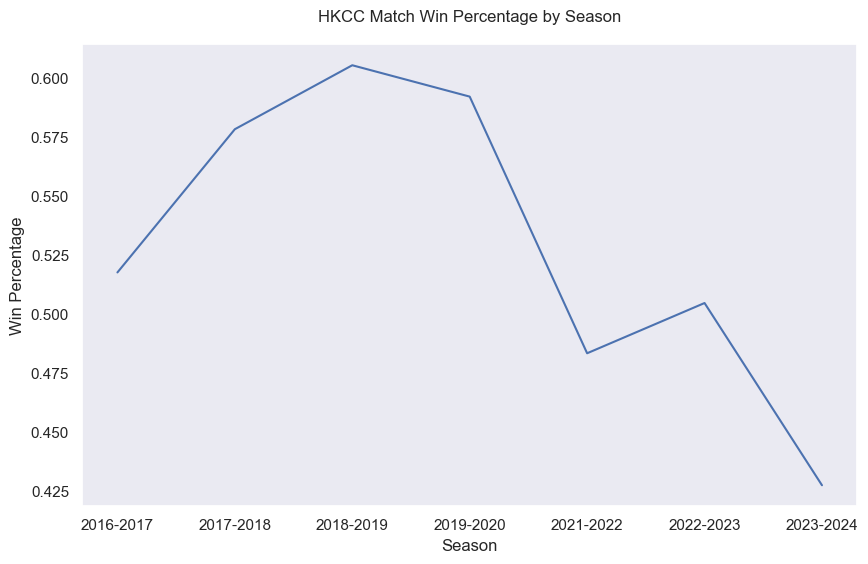

In [159]:
# Draw a line plot of the Win Percentage by Season
plt.figure(figsize=(10, 6))
# Draw a line plot of the Win Percentage by Season without confidence interval
sns.lineplot(data=hkcc_summary, x="Season", y="Win Percentage", errorbar=None)
# Set the title of the plot
plt.title("HKCC Match Win Percentage by Season", y=1.03)
# Remove gridlines
plt.grid(False)

In [160]:
# Filter big_summary_df for Team column that contains "HKCC" or "Hong Kong Cricket Club"
kcc_summary = big_summary_df[big_summary_df["Team"].str.contains("KCC|Kowloon Cricket Club", case=False)]

In [161]:
# Get overall win percentage record for hkcc_summary, summing all rows in Won column and dividing by sum of all rows in Played column
win_percentage = kcc_summary["Won"].sum() / kcc_summary["Played"].sum()
win_percentage

0.6693877551020408

In [ ]:
# Show Win Percentage by Season buy avoid SettingWithCopyWarning
kcc_summary = kcc_summary.copy()
kcc_summary["Win Percentage"] = hkcc_summary["Won"] / hkcc_summary["Played"]
hkcc_summary.groupby("Season")["Win Percentage"].mean()